In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [80]:
def parse_init(init_filepath):
    parameters = dict()
    with open(init_filepath, 'r') as f_in:
        for line in f_in:
            line_ls = line.split()
            
            if line_ls[0] == 'N:':
                parameters['N'] = int(line_ls[1])
            elif line_ls[0] == 'NMEAS:':
                parameters['NMEAS'] = int(line_ls[1])
            elif line_ls[0] == 'GEOM:':
                parameters['GEOM'] = line_ls[1]
    return parameters

def parse_g2_list(g2_list):
    return [x.replace('-', 'n').replace('.', 'd') for x in g2_list]

def parameters_to_name(parameters, g2):
    return parameters['GEOM'] + 'N' + str(parameters['N']) + 'g' + g2



In [85]:
path = '../data/20230607_256_p1q0/'
init_filepath = path + 'init.txt'
g2_filepath = path+ 'g2_all.txt'
parameters = parse_init(init_filepath)
print(parameters)

{'GEOM': 'p1q0', 'N': 256, 'NMEAS': 10000}


In [86]:
g2_list = []
with open(g2_filepath, 'r') as g2_in:
    for line in g2_in:
        g2_list.append(line.replace('\n', ''))
g2_list_float = [float(x) for x in g2_list]

In [87]:
#g2_list = ['-3', '-3.02', '-3.04', '-3.06', '-3.08', '-3.1', '-3.12', '-3.14', '-3.16', '-3.18', '-3.2', '-3.22', '-3.24', '-3.26', '-3.28', '-3.3', '-3.4', '-3.5', '-3.6']
#g2_list = ['-3.1']
g2_list = parse_g2_list(g2_list)
print(g2_list)
print(g2_list_float)

['n3', 'n3d02', 'n3d04', 'n3d06', 'n3d08', 'n3d1', 'n3d12', 'n3d14', 'n3d16', 'n3d18', 'n3d2', 'n3d202', 'n3d204', 'n3d206', 'n3d208', 'n3d21', 'n3d212', 'n3d214', 'n3d216', 'n3d218', 'n3d21825', 'n3d2185', 'n3d21875', 'n3d219', 'n3d21925', 'n3d2195', 'n3d22', 'n3d24', 'n3d26', 'n3d28', 'n3d3', 'n3d32', 'n3d34', 'n3d36', 'n3d38', 'n3d4', 'n3d42', 'n3d44', 'n3d46', 'n3d48', 'n3d5', 'n3d52', 'n3d54', 'n3d56', 'n3d58', 'n3d6']
[-3.0, -3.02, -3.04, -3.06, -3.08, -3.1, -3.12, -3.14, -3.16, -3.18, -3.2, -3.202, -3.204, -3.206, -3.208, -3.21, -3.212, -3.214, -3.216, -3.218, -3.21825, -3.2185, -3.21875, -3.219, -3.21925, -3.2195, -3.22, -3.24, -3.26, -3.28, -3.3, -3.32, -3.34, -3.36, -3.38, -3.4, -3.42, -3.44, -3.46, -3.48, -3.5, -3.52, -3.54, -3.56, -3.58, -3.6]


S:  -13943.58819
S:  -14995.618670000002
S:  -16053.30712
S:  -17116.35831
S:  -18184.6179
S:  -19258.567839999996
S:  -20337.95842
S:  -21422.7868
S:  -22512.91262
S:  -23608.74723
S:  -24710.232549999997
S:  -24820.6021
S:  -24931.18643
S:  -25041.69215
S:  -25152.33921
S:  -25263.12824
S:  -25373.68255
S:  -25484.683240000002
S:  -25595.55415
S:  -25706.57092
S:  -25720.477939999997
S:  -25734.08976
S:  -25748.11615
S:  -25762.103239999997
S:  -26509.407330000002
S:  -26053.248630000002
S:  -26567.57527
S:  -28130.7516
S:  -29848.252
S:  -31383.228829999996
S:  -33078.557459999996
S:  -34634.63724
S:  -36403.89759
S:  -38077.46555
S:  -39764.82099
S:  -41629.22738
S:  -43356.97993
S:  -45098.5464
S:  -46853.035379999994
S:  -48620.8767
S:  -50401.97901
S:  -52284.03155
S:  -54003.20314
S:  -56102.95624
S:  -57951.222929999996
S:  -59812.026770000004


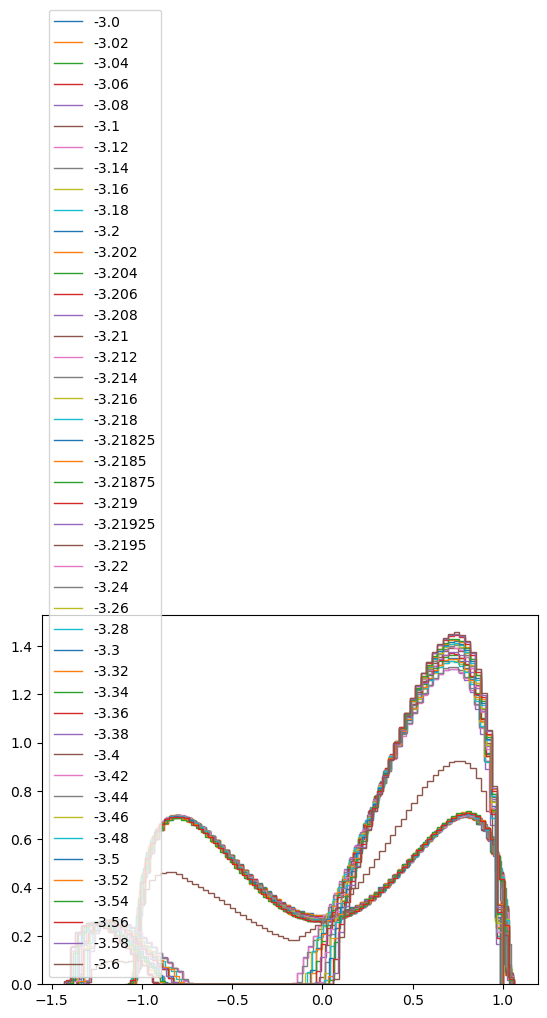

In [101]:
S = []
S_std = []
m1 = []
m2 = []
m3 = []
m1_std = []
m2_std = []
m3_std = []

for k, g2 in enumerate(g2_list):
    filename = parameters_to_name(parameters, g2)
    S_data_filepath = path + g2 + '/' + filename + '_S.txt'
    V_data_filepath = path + g2 + '/' + filename + '_V.txt'

    S_list = []
    with open(S_data_filepath, 'r') as S_in:
        for line in S_in:
            S_list.append(float(line))
        print("S: ", np.mean(S_list))
    
    V_list = []
    flat_V_list = []
    with open(V_data_filepath, 'r') as V_in:
        for line in V_in:
            V_list.append([float(x) for x in line.split()])
            center = np.mean(V_list[-1])
            for x in V_list[-1]:
                if parameters['GEOM'] == 'p0q1':
                    flat_V_list.append(float(x)-center)
                elif parameters['GEOM'] == 'p1q0':
                    flat_V_list.append(float(x))
    if np.mean(flat_V_list) < 0:
        flat_V_list = [-x for x in flat_V_list]
        
    flat_V2_list = [v**2 for v in flat_V_list]
    flat_V3_list = [v**3 for v in flat_V_list]
    m1.append(np.mean(flat_V_list))
    m1_std.append(np.std(flat_V_list))
    m2.append(np.mean(flat_V2_list))
    m2_std.append(np.std(flat_V2_list))
    m3.append(np.mean(flat_V3_list))
    m3_std.append(np.std(flat_V3_list))
            
    counts, bins = np.histogram(flat_V_list, bins=80, density=True)
    plt.stairs(counts, bins, label=g2_list_float[k])
    plt.legend()
    #plt.show()
    #plt.scatter(range(len(S_list)), S_list, s=2)
    #plt.show()
    S.append(np.mean(S_list))
    S_std.append(np.std(S_list))


In [90]:
with open(path + 'histo.txt', 'w') as f_out:
    for i in range(len(bins)-1):
        x = (bins[i]+bins[i+1])/2
        y = counts[i]
        f_out.write(str(x) + ' ' + str(y) + '\n')


In [91]:
np.mean(flat_V_list)

0.4572523562553906

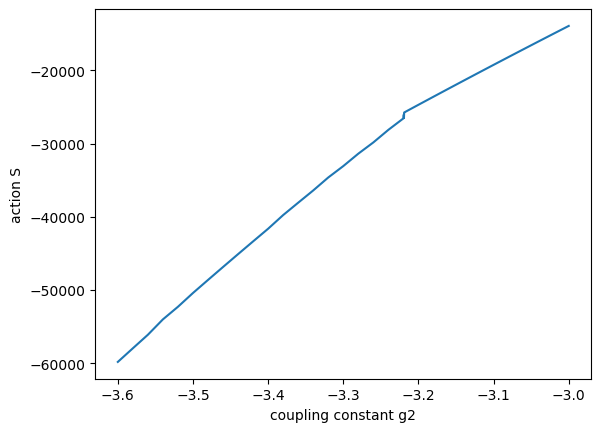

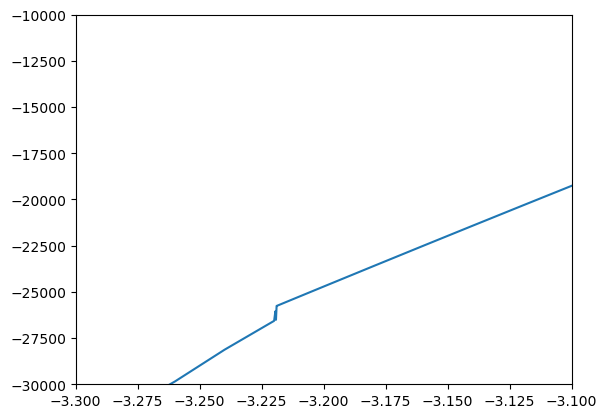

In [92]:
plt.errorbar(g2_list_float, S)
plt.xlabel('coupling constant g2')
plt.ylabel('action S')
plt.show()
plt.errorbar(g2_list_float, S)
plt.xlim(-3.3, -3.1)
plt.ylim(-30000, -10000)
plt.show()

In [93]:
def f(x):
    return -x/8

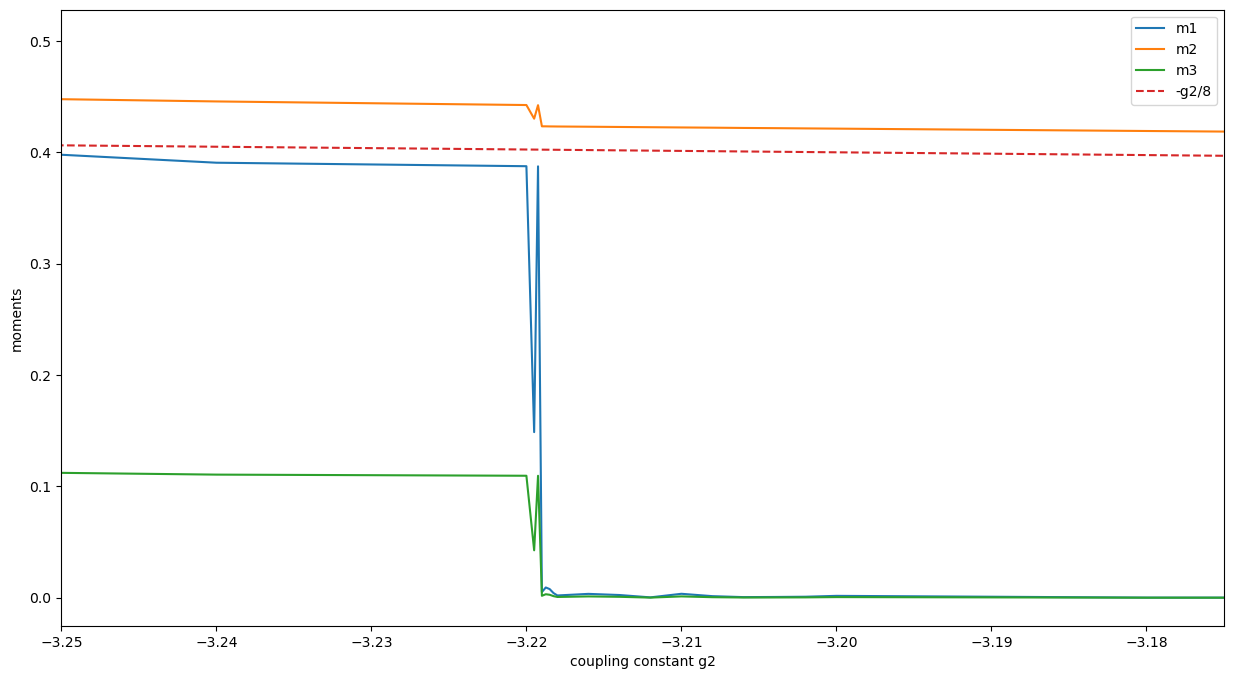

In [99]:
plt.figure(figsize=(15,8))
plt.plot(g2_list_float, m1, label="m1")
plt.plot(g2_list_float, m2, label="m2")
plt.plot(g2_list_float, m3, label="m3")
plt.plot(g2_list_float, [f(x) for x in g2_list_float], ls='--', label='-g2/8')
plt.xlabel('coupling constant g2')
plt.ylabel('moments')
plt.xlim(-3.250, -3.175)
plt.legend()
plt.show()